# 주성분 분석

### (1) 차원과 차원 축소

#### * 데이터가 가진 속성, 특성(feature) -> 벡터 개념(1차원 배열)에서 차원이라고 함.
#### * 과일 이미지의 10000개의 특성은 10000개의 차원을 가지고 있음
#### * 차원을 줄이는 방법 -> 주성분 분석(데이터의 분산이 큰 방향을 찾는 것)
#### * 일반적으로 주성분은 원본의 특성 갯수만큼 찾을 수 있다.


### (2) pca 클래스

In [2]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50) # 주성분의 갯수를 50으로 지정
pca.fit(fruits_2d)


PCA(n_components=50)

In [4]:
print(pca.components_.shape)

(50, 10000)


#### 차원 축소를 통해 얻어진 이미지를 그려본다.

In [8]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):  #arr - 샘플이미지배열
    n = len(arr) # n은 전체 샘플의 수
    # 한줄에 10개의 이미지를 그림
    rows = int(np.ceil(n/10)) # 행의 수 계산
    # 행이 1개이면 열의 갯수는 샘플의 갯수
    cols = n if rows<2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i *10+j < n:
                axs[i, j].imshow(arr[i*10+j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()
    

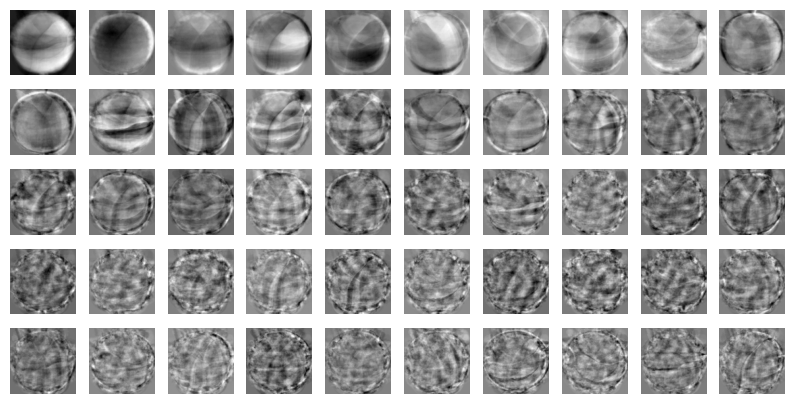

In [9]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [10]:
print(fruits_2d.shape)

(300, 10000)


In [11]:
# 차원 축소로 얻어진 특성을 사용하여 원본 데이터를 변환 : transform()
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


### (3) 원본 데이터 재구성

#### 앞에서 원본 특성 10,000개를 50개로 줄였으므로 손실이 발생할 수 밖에 없음.

In [13]:
# 원본 데이터 재구성 메소드 : inverse_transform()
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


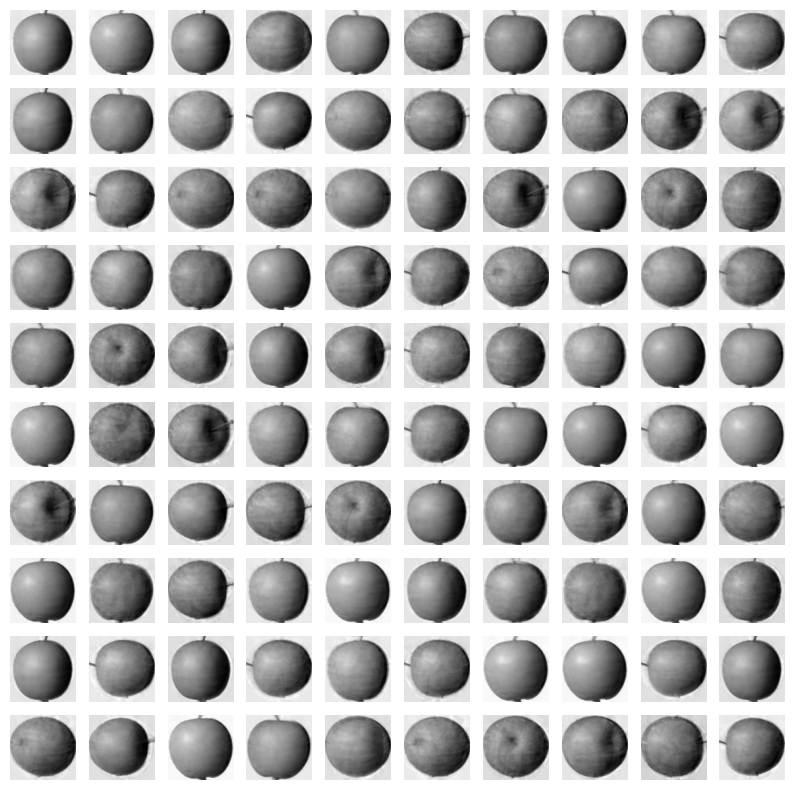

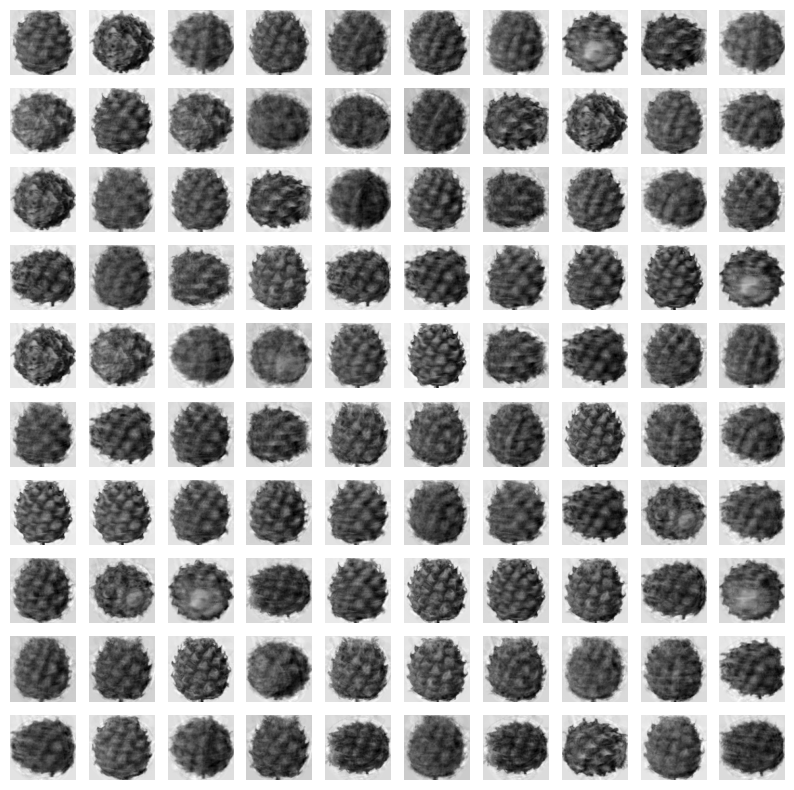

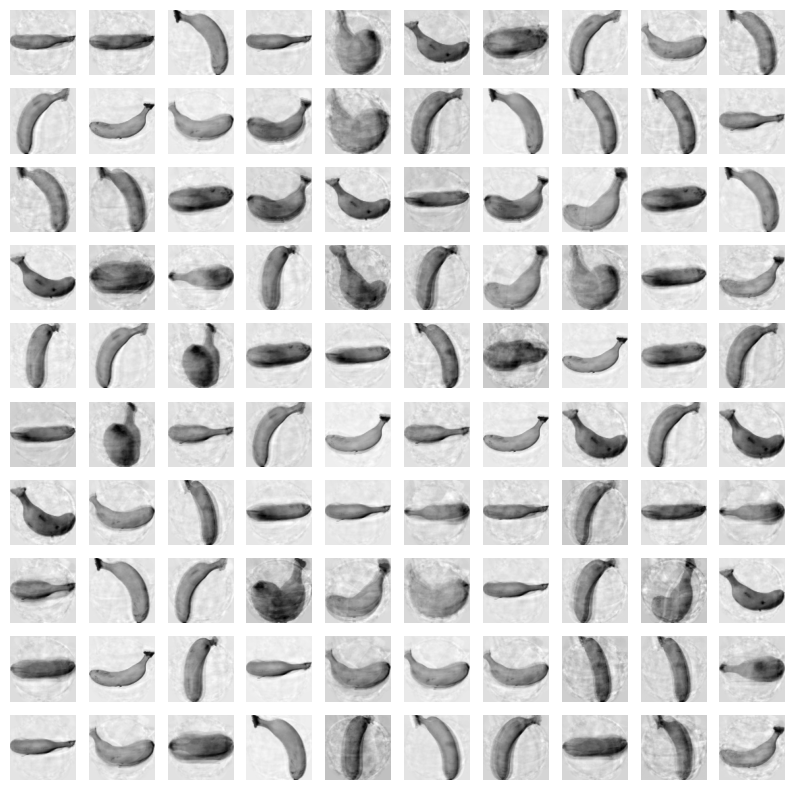

In [17]:
# 100*100 크기로 바꾸어 100개씩 출력
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

#### 대부분이 거의 잘 복원 되었음.

### (4) 설명된 분산 

#### * 설명된 분산 - 주성분이 원본 데이터를 얼마나 잘 나타내는지 기록한 값
#### * PCA 클래스에서 explained_variance_ratio_ 속성에 저장된

In [18]:
print(np.sum(pca.explained_variance_ratio_))

0.9214298249180982


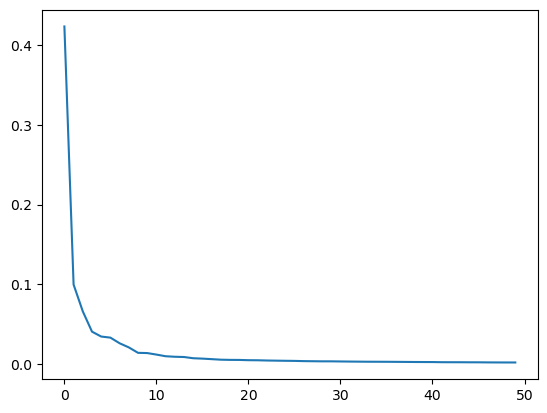

In [19]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

#### 10개의 주성분을 지정하는 것만으로 대부분의 원본 이미지를 표현할 수 있음.

## 2. 다른 알고리즘과 함께 사용하기

### (1) 지스틱 회귀모델 사용

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

#### 지도학습을 사용하려면 타깃 데이터 필요

In [22]:
target = np.array([0]*100 + [1]*100 + [2]*100)

In [23]:
print(target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


In [25]:
# 측정 점수평균과 측정시간을 얻기 위해 cross_validate() 사용
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.36712965965270994


#### * 교차검증 점수 : 0.997
#### * 훈련 시간 : 0.36초

#### PCA를 적용한 축소 데이터 fruits_pca와 비교

In [28]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.016344833374023437


#### 정확도가 100%이고 훈련시간 0.016초

#### 차원 축소로 저장공간도 줄어들고 훈련속도도 높임.

#### PCA 실행시 n_components 의 값은 특성의 값 대신 설명된 분산 비율을 입력할 수 있음.

In [43]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [44]:
# 몇 개의 주성분을 찾았는지 확인
print(pca.n_components_)

2


In [49]:
# 이 모델로 원본 데이터를 주성분이 2개인 데이터로 변환
fruits_pca = pca.transform(fruits_2d)
print(friuts_pca.shape)

(300, 2)


In [50]:
# 교차 검증 확인
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.99
0.023196935653686523


C:\Users\602-01\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\602-01\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

#### 2개의 특성을 사용해서 99% 정확도 달성

### (2) k-평균 알고리즘 사용

In [53]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

C:\Users\602-01\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\602-01\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


(array([0, 1, 2]), array([110,  99,  91], dtype=int64))


#### fruits_pca 찾은 클러스터는 원본 데이터와 결과가 비슷함.

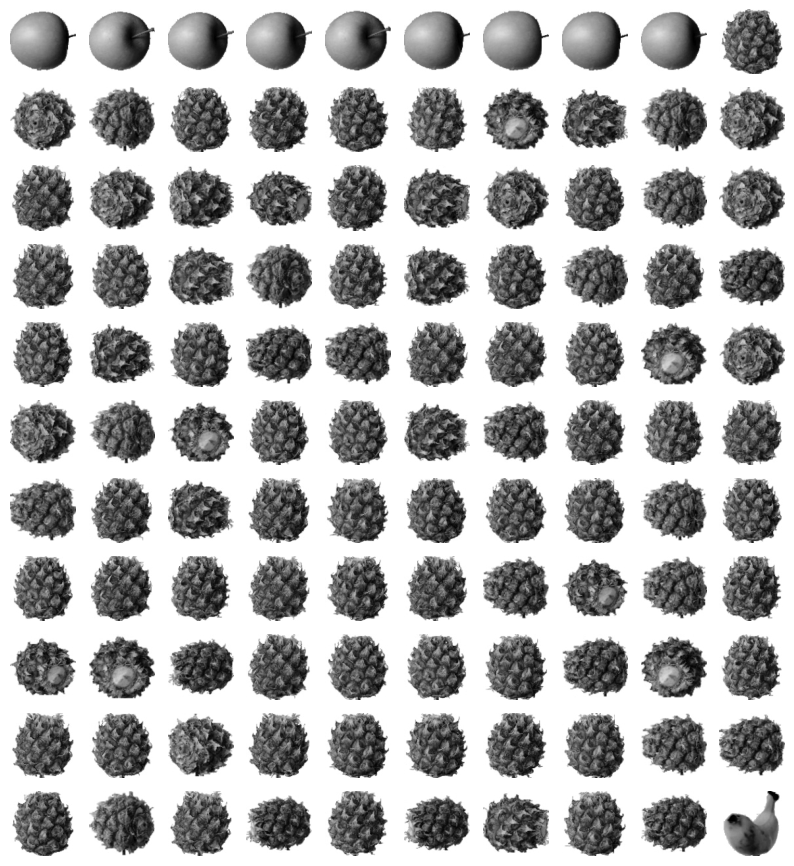

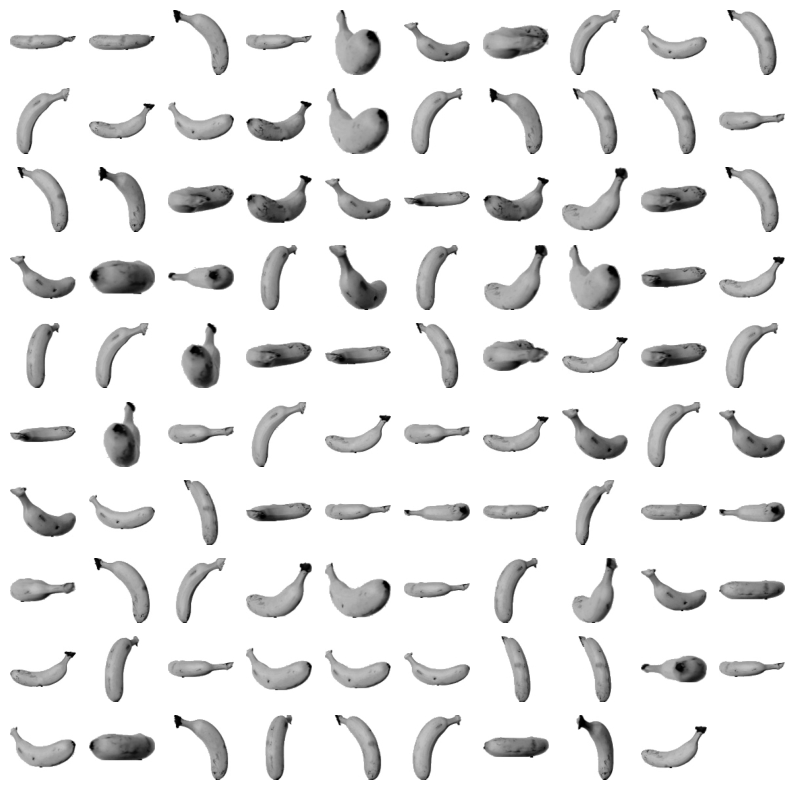

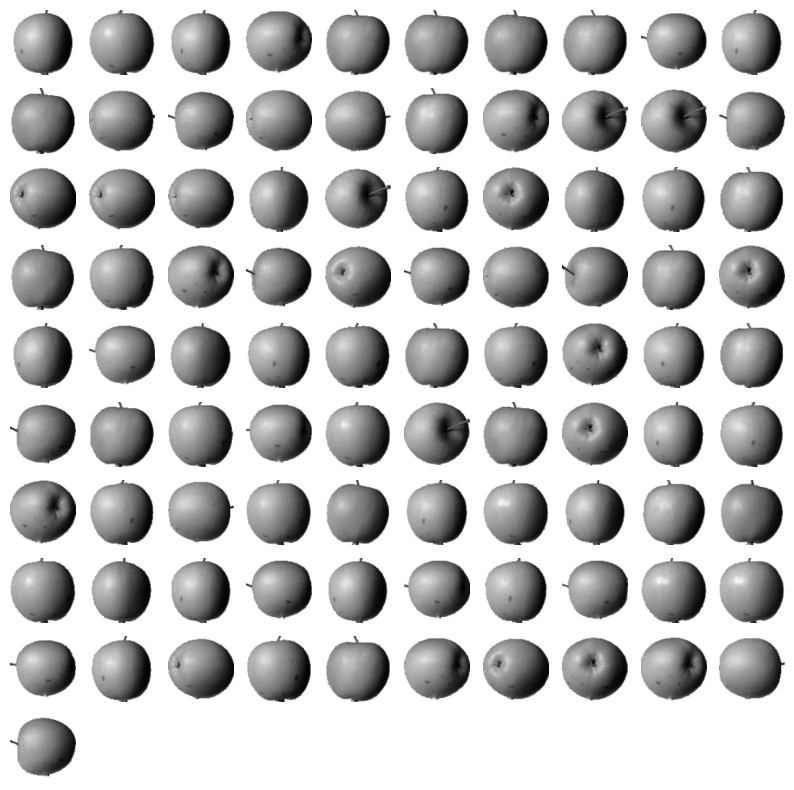

In [55]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print('\n')

#### 파인애플이 사과와 혼돈됨.

#### 주성분이 2개이므로 산점도를 사용해 그래프를 그릴 수 있음.

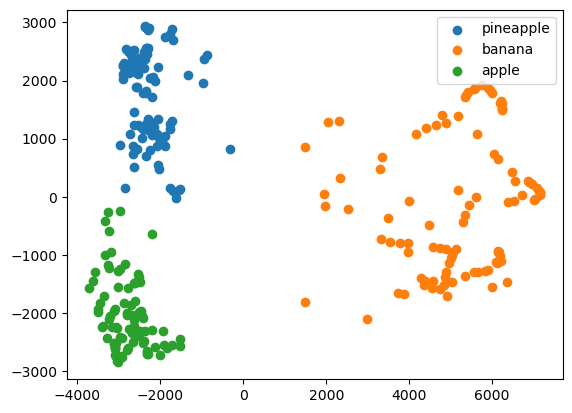

In [57]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:, 0], data[:, 1])
plt.legend(['pineapple', 'banana', 'apple'])
plt.show()